In [ ]:
# default_exp first_layer_thickness_scan

#  First layer thickness scan
> Study the effect of the variation the first layer thickness on energy deposited in the sensor.

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#hide
from ProtonBeamTherapy.macrotools import *
from ProtonBeamTherapy.analysis import *

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Beam energy 250 MeV

vary thickness of the first layer between 0.5 cm and 1.5 cm in 1 mm steps

In [ ]:
edep = []
th0 = np.linspace(0.5, 1.5, num=10)
for t in th0:
    # vary the thickness only for the 0th layer for the other 19 it will be 1 cm
    main_macro, output_root = create_all(phantom_layer_thickness=[t]+[1]*19) 
    run_macro(main_macro)
    root_hits_file = output_root['hits'][0]
    edep.append(get_edep_data(get_df_subentry2(root_hits_file), sensor=0))

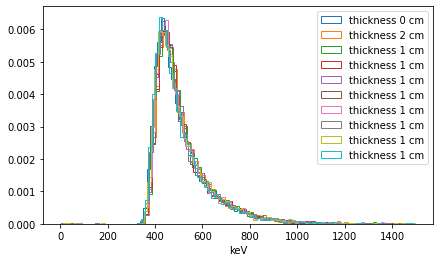

In [ ]:
fig0, ax0 = plt.subplots(figsize=(7, 4))
for i in range(10):
    __ = plt.hist(edep[-i][edep[-i]<1500], bins=100, histtype='step', density=True, label=f'thickness {round(th0[-i])} cm')
plt.xlabel('keV')
ax0.legend()

In [ ]:
m = np.array([np.mean(e) for e in edep])
em = np.array([stats.sem(e) for e in edep])
tm = np.array([stats.tmean(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep])
etm = np.array([stats.tsem(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep])

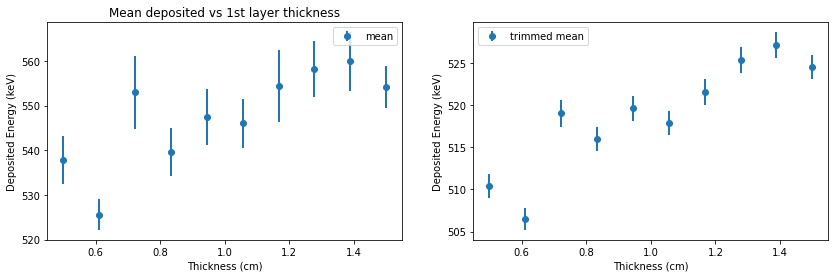

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 4))
ax2.errorbar(th0, tm, yerr=etm, fmt='o', lw=0, elinewidth=2, label='trimmed mean')
ax1.errorbar(th0, m, yerr=em, fmt='o', lw=0, elinewidth=2, label='mean')
ax1.set_title('Mean deposited vs 1st layer thickness')
ax1.set_xlabel('Thickness (cm)')
ax1.set_ylabel('Deposited Energy (keV)')
ax1.legend()
#ax2.set_xlim(173, 240)
#ax2.set_ylim(0, 0.01)
#ax2.scatter(th0, tm /etm, label='SNR for trimmed mean')
ax2.set_xlabel('Thickness (cm)')
ax2.set_ylabel('Deposited Energy (keV)')
ax2.legend()

## Beam energy 200 MeV

vary thickness of the first layer between 0.5 cm and 1.5 cm in 1 mm steps

In [ ]:
edep200 = []
th0_200 = np.linspace(0.5, 1.5, num=10)
for t in th0:
    # vary the thickness only for the 0th layer for the other 19 it will be 1 cm
    main_macro, output_root = create_all(beam_energy=200, phantom_layer_thickness=[t]+[1]*19) 
    run_macro(main_macro)
    root_hits_file = output_root['hits'][0]
    edep200.append(get_edep_data(get_df_subentry2(root_hits_file), sensor=0))

In [ ]:
m200 = np.array([np.mean(e) for e in edep200])
em200 = np.array([stats.sem(e) for e in edep200])
tm200 = np.array([stats.tmean(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep200])
etm200 = np.array([stats.tsem(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep200])

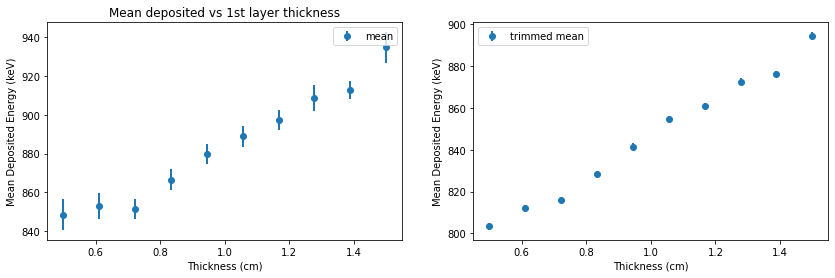

In [ ]:
fig2, (ax3, ax4) = plt.subplots(1,2,figsize=(14, 4))
ax4.errorbar(th0_200, tm200, yerr=etm200, fmt='o', lw=0, elinewidth=2, label='trimmed mean')
ax3.errorbar(th0_200, m200, yerr=em200, fmt='o', lw=0, elinewidth=2, label='mean')
ax3.set_title('Mean deposited vs 1st layer thickness')
ax3.set_xlabel('Thickness (cm)')
ax3.set_ylabel('Mean Deposited Energy (keV)')
ax3.legend()
#ax2.set_xlim(173, 240)
#ax2.set_ylim(0, 0.01)
#ax2.scatter(th0, tm /etm, label='SNR for trimmed mean')
ax4.set_xlabel('Thickness (cm)')
ax4.set_ylabel('Mean Deposited Energy (keV)')
ax4.legend()

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_macrotools.ipynb.
Converted 01_analysis.ipynb.
Converted 02_scanners.ipynb.
Converted 20_analysis0.ipynb.
Converted 21_analysis1.ipynb.
Converted index.ipynb.
